In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
task2 = pd.read_csv('IMDB Movies India.csv', encoding='ISO-8859-1')


In [25]:
task2.info

<bound method DataFrame.info of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes

In [26]:
print(task2.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [27]:
task2.shape

(15509, 10)

In [65]:
task2.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [28]:
features = ['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

In [29]:
task2.dropna(subset=[target], inplace=True)
task2.fillna('Unknown', inplace=True)

In [30]:
label_encoders = {}
for column in features:
    if task2[column].dtype == 'object':
        le = LabelEncoder()
        task2[column] = le.fit_transform(task2[column])
        label_encoders[column] = le

In [42]:
X = task2[features]
y = task2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_indices = X_test.index

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [44]:
y_pred = model.predict(X_test)
y_pred

array([5.057, 5.704, 6.046, ..., 5.612, 5.584, 6.334])

In [45]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 1.45
R^2 Score: 0.22


In [47]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

In [49]:
results = pd.DataFrame({
    'index': X_test_indices,  # Use the preserved indices
    'rating': y_pred
})

# Save the predictions to a CSV file
results.to_csv('movie_predictions.csv', index=False)

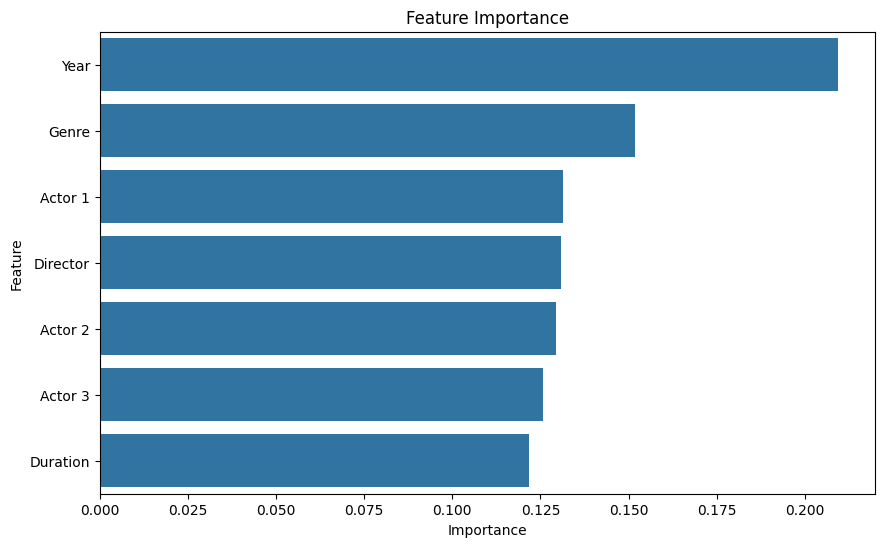

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

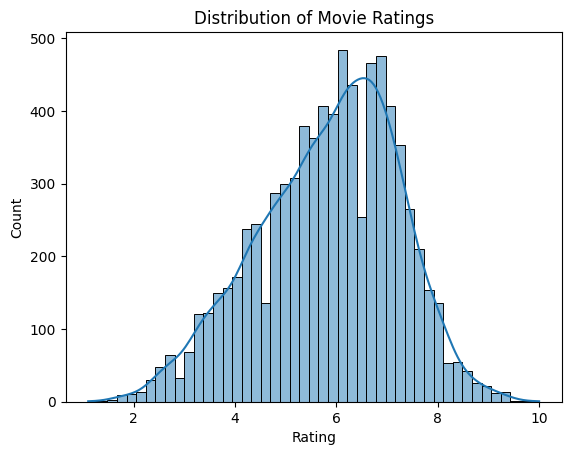

In [50]:
sns.histplot(task2['Rating'], kde=True)
plt.title('Distribution of Movie Ratings')
plt.show()

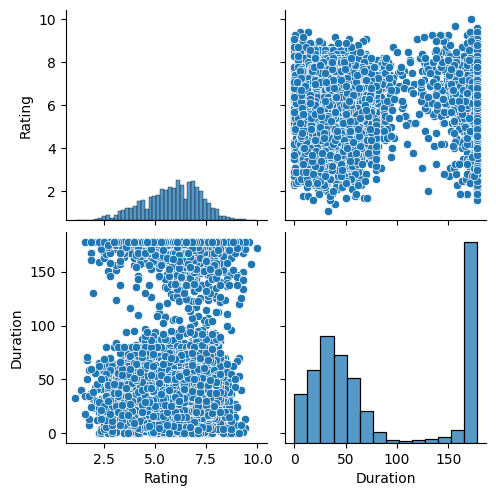

In [53]:
sns.pairplot(task2[['Rating', 'Duration', 'Votes']])
plt.show()


In [55]:
# Find the highest-rated movie
highest_rated_movie = task2.loc[task2['Rating'].idxmax()]

# Extract the movie name and year
highest_rating = highest_rated_movie['Rating']
highest_rated_movie_name = highest_rated_movie['Name']
highest_rated_movie_year = highest_rated_movie['Year']

print(f"The highest-rated movie is '{highest_rated_movie_name}' with a rating of {highest_rating} in the year {highest_rated_movie_year}.")


The highest-rated movie is 'Love Qubool Hai' with a rating of 10.0 in the year 90.


C:\Users\manas\AppData\Local\Temp\ipykernel_26492\946164938.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Name', data=top_movies, palette='viridis')


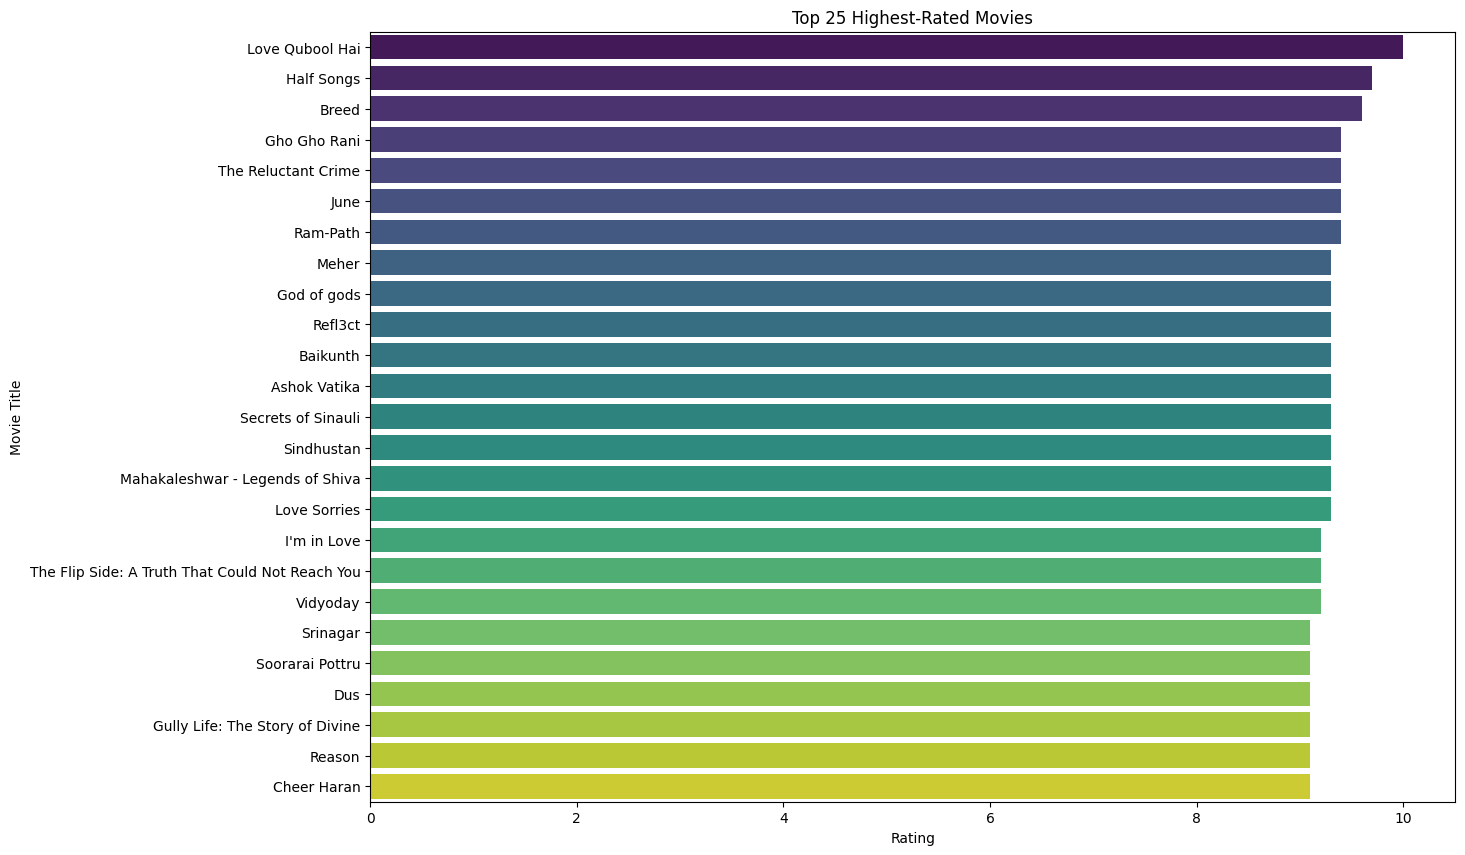

In [64]:
# Ensure there are no missing values in 'Rating' and 'Name' columns
task2 = task2.dropna(subset=['Rating', 'Name'])

# Convert 'Rating' to numeric, in case it's not already
task2['Rating'] = pd.to_numeric(task2['Rating'], errors='coerce')

# Drop rows with NaN in 'Rating' after conversion
task2 = task2.dropna(subset=['Rating'])

# Sort the movies by rating in descending order
top_movies = task2.sort_values(by='Rating', ascending=False).head(25)

# Plotting
plt.figure(figsize=(14, 10))
sns.barplot(x='Rating', y='Name', data=top_movies, palette='viridis')
plt.title('Top 25 Highest-Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.show()